## Trees from bipartitions files

('ddocent', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf515ef90>)
('ipyrad-denovo-minus', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf521d150>)
('ipyrad-reference', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf52ed390>)
('ipyrad-denovo-plus', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf5291450>)
('stacks', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf51e4b90>)


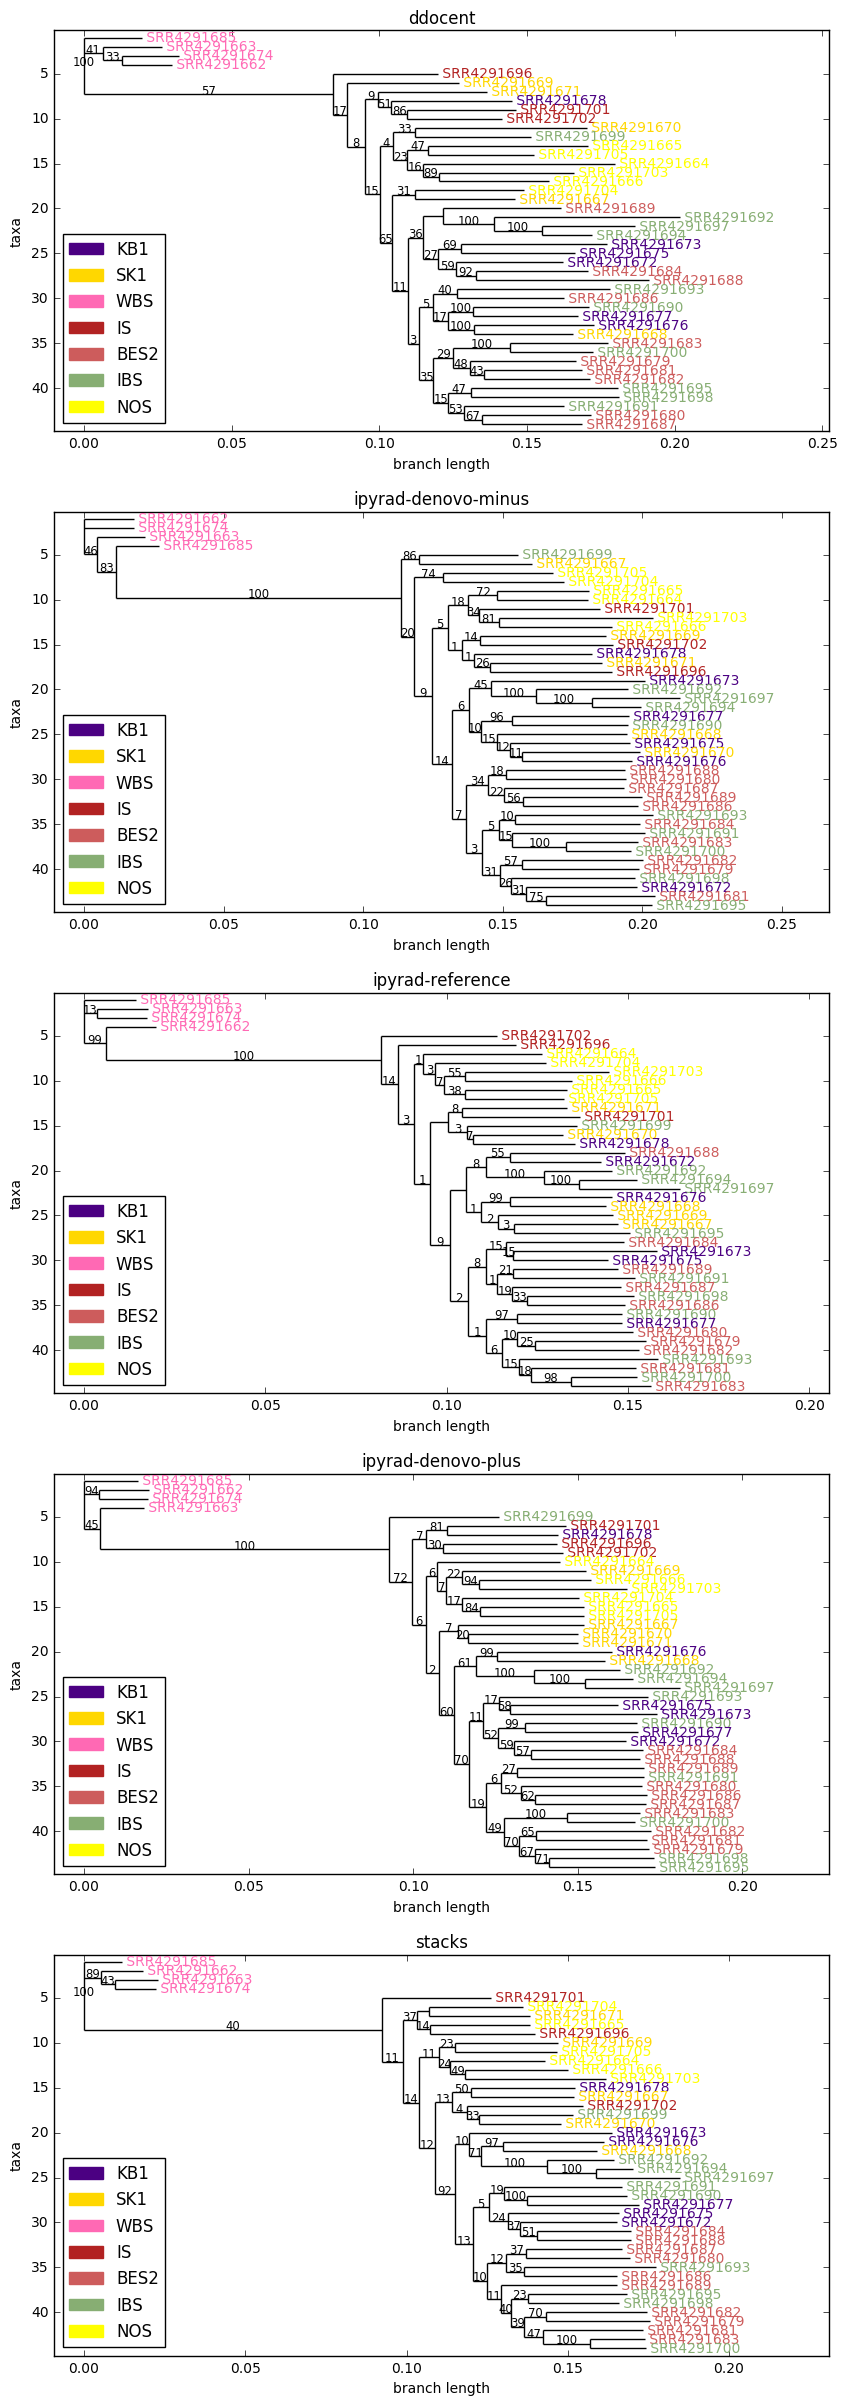

In [26]:

from Bio import Phylo
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
plt.rcParams["figure.figsize"] = [12,9]

ipyrad_reftree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bipartitions.ipyrad-reference-empirical"
stackstree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bipartitions.stacks-empirical"
ddocenttree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bipartitions.ddocent-empirical"
ipyrad_minustree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bipartitions.ipyrad-denovo_minus_reference-empirical"
ipyrad_plustree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bipartitions.ipyrad-denovo_plus_reference-095-empirical"
treefiles = {"ipyrad-reference":ipyrad_reftree, "stacks":stackstree,\
             "ddocent":ddocenttree, "ipyrad-denovo-minus":ipyrad_minustree,\
             "ipyrad-denovo-plus":ipyrad_plustree}

## empirical
emp_pops = {}
emp_sample_names = []
popfile = "/home/iovercast/manuscript-analysis/Phocoena_empirical/stacks/popmap.txt"
with open(popfile) as infile:
    lines = [l.strip().split() for l in infile.readlines()]
    emp_sample_names = [x[0] for x in lines]
    pops = set([x[1] for x in lines])
    for pop in pops: emp_pops[pop] = []
    for line in lines:
        p = line[1]
        s = line[0]
        emp_pops[p].append(s)
emp_pop_colors = {k:v for (k,v) in zip(emp_pops, list(matplotlib.colors.cnames))}
#print(emp_pop_colors)
#print(emp_pops)

emp_colors_per_sample = {}
for samp in emp_sample_names:
    for pop in emp_pops:
        if samp in emp_pops[pop]:
            emp_colors_per_sample[samp] = emp_pop_colors[pop]
#print(emp_colors_per_sample)

legend_colors = [matplotlib.patches.Patch(color=v, label=k) for k,v in emp_pop_colors.items()]

## Root the tree on the WBS pop
outgroup = [{'name': taxon_name} for taxon_name in emp_pops["WBS"]]

f, axarr = plt.subplots(5, 1, figsize=(10, 30), dpi=1000)
#axarr = [a for b in axarr for a in b]

for name, ax in zip(treefiles.keys(), axarr):
    print(name, ax)
    tree = Phylo.read(treefiles[name], 'newick')
    tree.root_with_outgroup(*outgroup)

    tree.ladderize()
    ## This could be cool but doesn't work
    Phylo.draw(tree, axes=ax, label_colors=emp_colors_per_sample, do_show=False)
    ax.set_title(name)
    ax.legend(handles=legend_colors, loc="lower left")
#axarr[0].legend(handles=legend_colors)

## Trees from bestTree

('ddocent', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf81bead0>)
('ipyrad-denovo-minus', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf835a1d0>)
('ipyrad-reference', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf834bb90>)
('ipyrad-denovo-plus', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf82d4b10>)
('stacks', <matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf855b310>)


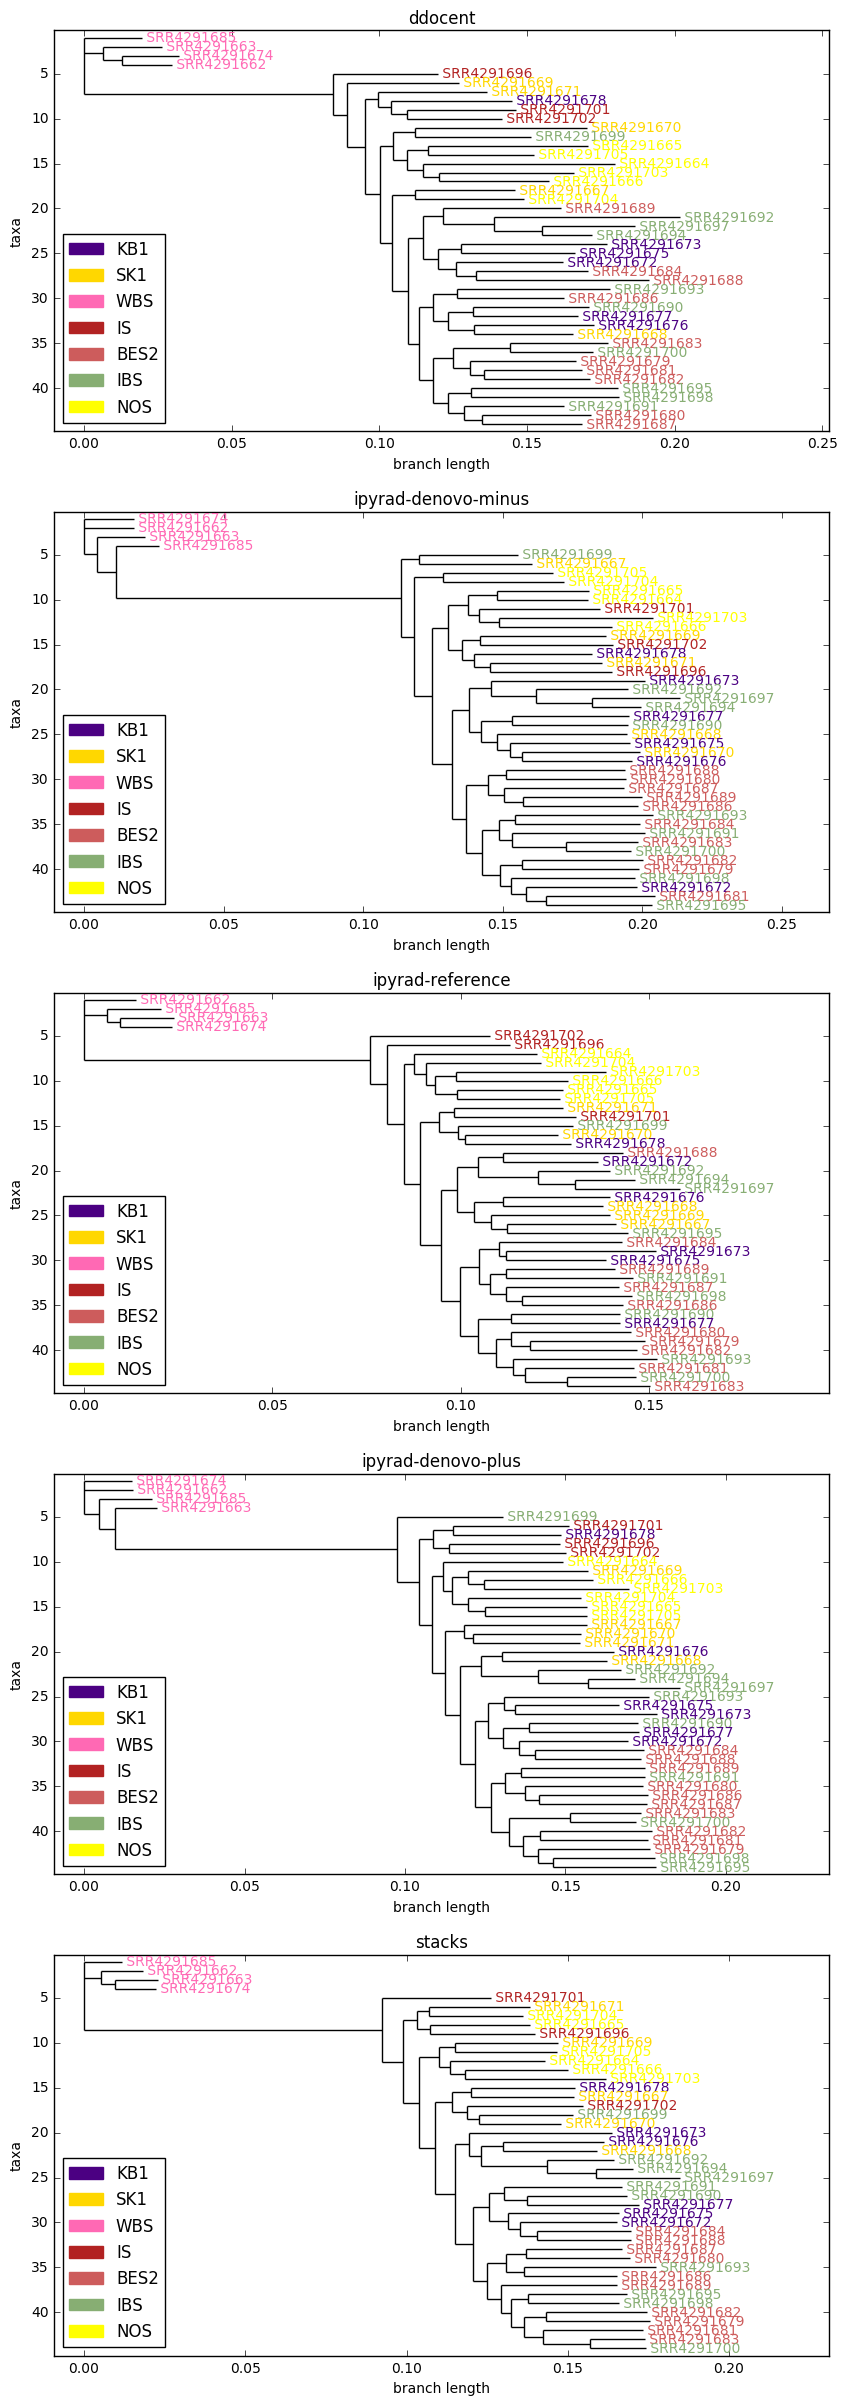

In [30]:
from Bio import Phylo
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
plt.rcParams["figure.figsize"] = [12,9]

ipyrad_reftree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bestTree.ipyrad-reference-empirical"
stackstree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bestTree.stacks-empirical"
ddocenttree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bestTree.ddocent-empirical"
ipyrad_minustree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bestTree.ipyrad-denovo_minus_reference-empirical"
ipyrad_plustree = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bestTree.ipyrad-denovo_plus_reference-095-empirical"
treefiles = {"ipyrad-reference":ipyrad_reftree, "stacks":stackstree,\
             "ddocent":ddocenttree, "ipyrad-denovo-minus":ipyrad_minustree,\
             "ipyrad-denovo-plus":ipyrad_plustree}

## empirical
emp_pops = {}
emp_sample_names = []
popfile = "/home/iovercast/manuscript-analysis/Phocoena_empirical/stacks/popmap.txt"
with open(popfile) as infile:
    lines = [l.strip().split() for l in infile.readlines()]
    emp_sample_names = [x[0] for x in lines]
    pops = set([x[1] for x in lines])
    for pop in pops: emp_pops[pop] = []
    for line in lines:
        p = line[1]
        s = line[0]
        emp_pops[p].append(s)
emp_pop_colors = {k:v for (k,v) in zip(emp_pops, list(matplotlib.colors.cnames))}
#print(emp_pop_colors)
#print(emp_pops)

emp_colors_per_sample = {}
for samp in emp_sample_names:
    for pop in emp_pops:
        if samp in emp_pops[pop]:
            emp_colors_per_sample[samp] = emp_pop_colors[pop]
#print(emp_colors_per_sample)

## Root the tree on the WBS pop
outgroup = [{'name': taxon_name} for taxon_name in emp_pops["WBS"]]

legend_colors = [matplotlib.patches.Patch(color=v, label=k) for k,v in emp_pop_colors.items()]

f, axarr = plt.subplots(5, 1, figsize=(10, 30), dpi=1000)
#axarr = [a for b in axarr for a in b]

for name, ax in zip(treefiles.keys(), axarr):
    print(name, ax)
    tree = Phylo.read(treefiles[name], 'newick')
    tree.root_with_outgroup(*outgroup)
    tree.ladderize()
    ## This could be cool but doesn't work
    Phylo.draw(tree, axes=ax, label_colors=emp_colors_per_sample, do_show=False)
    ax.set_title(name)
    ax.legend(handles=legend_colors, loc="lower left")


# Everything below here is crap

In [20]:
outgroup = [{'name': taxon_name} for taxon_name in emp_pops["WBS"]]
print(outgroup)


SyntaxError: invalid syntax (<ipython-input-20-aa435f98bc68>, line 3)

{'SRR4291704': u'yellow', 'SRR4291705': u'yellow', 'SRR4291700': u'sage', 'SRR4291701': u'firebrick', 'SRR4291702': u'firebrick', 'SRR4291703': u'yellow', 'SRR4291685': u'hotpink', 'SRR4291684': u'indianred', 'SRR4291687': u'indianred', 'SRR4291686': u'indianred', 'SRR4291681': u'indianred', 'SRR4291680': u'indianred', 'SRR4291683': u'indianred', 'SRR4291682': u'indianred', 'SRR4291689': u'indianred', 'SRR4291688': u'indianred', 'SRR4291674': u'hotpink', 'SRR4291675': u'indigo', 'SRR4291676': u'indigo', 'SRR4291677': u'indigo', 'SRR4291670': u'gold', 'SRR4291671': u'gold', 'SRR4291672': u'indigo', 'SRR4291673': u'indigo', 'SRR4291678': u'indigo', 'SRR4291679': u'indianred', 'SRR4291696': u'firebrick', 'SRR4291697': u'sage', 'SRR4291694': u'sage', 'SRR4291695': u'sage', 'SRR4291692': u'sage', 'SRR4291693': u'sage', 'SRR4291690': u'sage', 'SRR4291691': u'sage', 'SRR4291698': u'sage', 'SRR4291699': u'sage', 'SRR4291669': u'gold', 'SRR4291668': u'gold', 'SRR4291663': u'hotpink', 'SRR429166

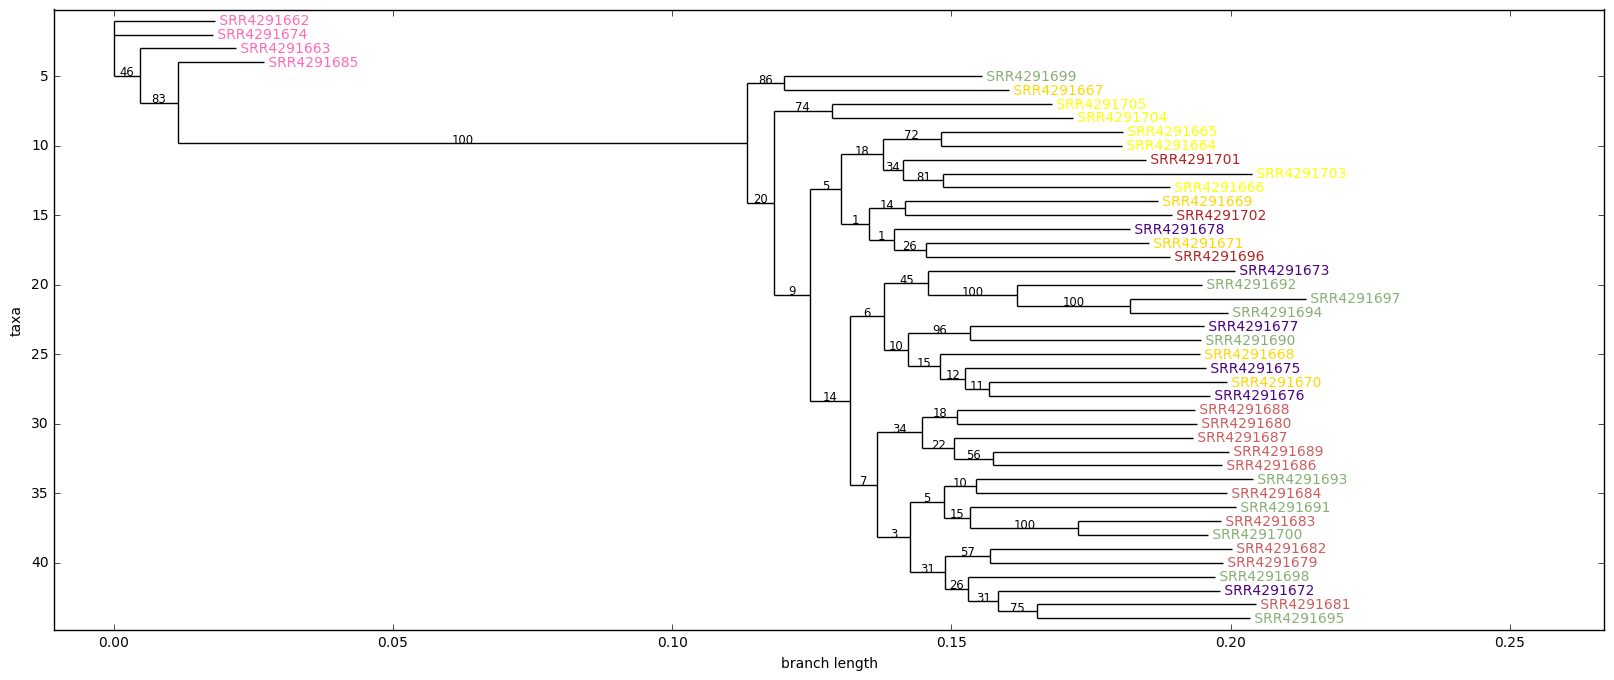

In [20]:
from Bio import Phylo
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
plt.rcParams["figure.figsize"] = [12,9]

f, axarr = plt.subplots(1, 1, figsize=(20,8), dpi=1000)

## empirical
emp_pops = {}
emp_sample_names = []
popfile = "/home/iovercast/manuscript-analysis/Phocoena_empirical/stacks/popmap.txt"
with open(popfile) as infile:
    lines = [l.strip().split() for l in infile.readlines()]
    emp_sample_names = [x[0] for x in lines]
    pops = set([x[1] for x in lines])
    for pop in pops: emp_pops[pop] = []
    for line in lines:
        p = line[1]
        s = line[0]
        emp_pops[p].append(s)
emp_pop_colors = {k:v for (k,v) in zip(emp_pops, list(matplotlib.colors.cnames))}
#print(emp_pop_colors)
#print(emp_pops)

emp_colors_per_sample = {}
for samp in emp_sample_names:
    for pop in emp_pops:
        if samp in emp_pops[pop]:
            emp_colors_per_sample[samp] = emp_pop_colors[pop]
print(emp_colors_per_sample)

tfile = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bipartitions.ipyrad-denovo_minus_reference-empirical"
tree = Phylo.read(tfile, 'newick')
tree.ladderize()
## This could be cool but doesn't work
Phylo.draw(tree, axes=axarr, label_colors=emp_colors_per_sample)
axarr.legend(emp_pop_colors)

{'SRR4291704': u'yellow', 'SRR4291705': u'yellow', 'SRR4291700': u'sage', 'SRR4291701': u'firebrick', 'SRR4291702': u'firebrick', 'SRR4291703': u'yellow', 'SRR4291685': u'hotpink', 'SRR4291684': u'indianred', 'SRR4291687': u'indianred', 'SRR4291686': u'indianred', 'SRR4291681': u'indianred', 'SRR4291680': u'indianred', 'SRR4291683': u'indianred', 'SRR4291682': u'indianred', 'SRR4291689': u'indianred', 'SRR4291688': u'indianred', 'SRR4291674': u'hotpink', 'SRR4291675': u'indigo', 'SRR4291676': u'indigo', 'SRR4291677': u'indigo', 'SRR4291670': u'gold', 'SRR4291671': u'gold', 'SRR4291672': u'indigo', 'SRR4291673': u'indigo', 'SRR4291678': u'indigo', 'SRR4291679': u'indianred', 'SRR4291696': u'firebrick', 'SRR4291697': u'sage', 'SRR4291694': u'sage', 'SRR4291695': u'sage', 'SRR4291692': u'sage', 'SRR4291693': u'sage', 'SRR4291690': u'sage', 'SRR4291691': u'sage', 'SRR4291698': u'sage', 'SRR4291699': u'sage', 'SRR4291669': u'gold', 'SRR4291668': u'gold', 'SRR4291663': u'hotpink', 'SRR429166

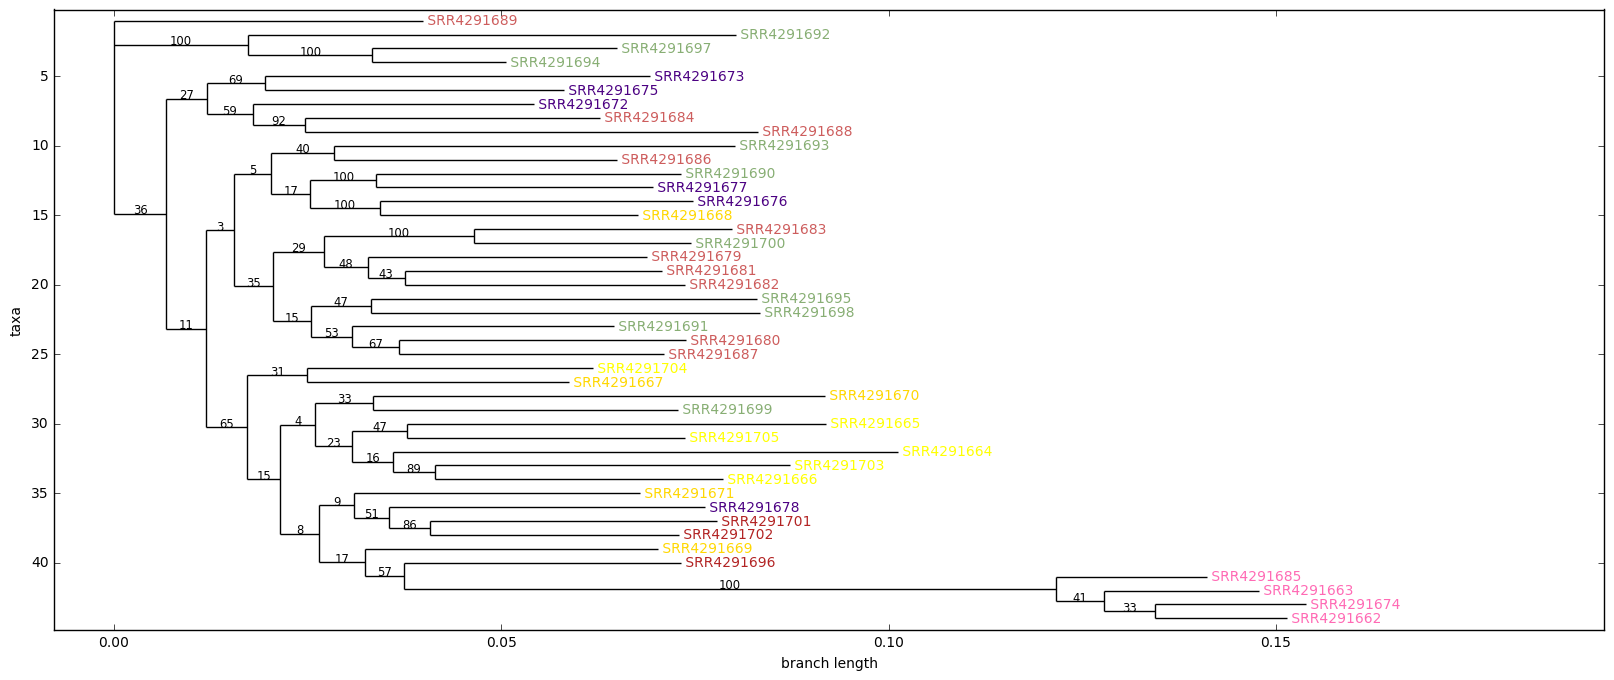

In [21]:
from Bio import Phylo
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
plt.rcParams["figure.figsize"] = [12,9]

f, axarr = plt.subplots(1, 1, figsize=(20,8), dpi=1000)

## empirical
emp_pops = {}
emp_sample_names = []
popfile = "/home/iovercast/manuscript-analysis/Phocoena_empirical/stacks/popmap.txt"
with open(popfile) as infile:
    lines = [l.strip().split() for l in infile.readlines()]
    emp_sample_names = [x[0] for x in lines]
    pops = set([x[1] for x in lines])
    for pop in pops: emp_pops[pop] = []
    for line in lines:
        p = line[1]
        s = line[0]
        emp_pops[p].append(s)
emp_pop_colors = {k:v for (k,v) in zip(emp_pops, list(matplotlib.colors.cnames))}
#print(emp_pop_colors)
#print(emp_pops)

emp_colors_per_sample = {}
for samp in emp_sample_names:
    for pop in emp_pops:
        if samp in emp_pops[pop]:
            emp_colors_per_sample[samp] = emp_pop_colors[pop]
print(emp_colors_per_sample)

tfile = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bipartitions.ddocent-empirical"
tree = Phylo.read(tfile, 'newick')
tree.ladderize()
## This could be cool but doesn't work
Phylo.draw(tree, axes=axarr, label_colors=emp_colors_per_sample)
axarr.legend(emp_pop_colors)

{'SRR4291704': u'yellow', 'SRR4291705': u'yellow', 'SRR4291700': u'sage', 'SRR4291701': u'firebrick', 'SRR4291702': u'firebrick', 'SRR4291703': u'yellow', 'SRR4291685': u'hotpink', 'SRR4291684': u'indianred', 'SRR4291687': u'indianred', 'SRR4291686': u'indianred', 'SRR4291681': u'indianred', 'SRR4291680': u'indianred', 'SRR4291683': u'indianred', 'SRR4291682': u'indianred', 'SRR4291689': u'indianred', 'SRR4291688': u'indianred', 'SRR4291674': u'hotpink', 'SRR4291675': u'indigo', 'SRR4291676': u'indigo', 'SRR4291677': u'indigo', 'SRR4291670': u'gold', 'SRR4291671': u'gold', 'SRR4291672': u'indigo', 'SRR4291673': u'indigo', 'SRR4291678': u'indigo', 'SRR4291679': u'indianred', 'SRR4291696': u'firebrick', 'SRR4291697': u'sage', 'SRR4291694': u'sage', 'SRR4291695': u'sage', 'SRR4291692': u'sage', 'SRR4291693': u'sage', 'SRR4291690': u'sage', 'SRR4291691': u'sage', 'SRR4291698': u'sage', 'SRR4291699': u'sage', 'SRR4291669': u'gold', 'SRR4291668': u'gold', 'SRR4291663': u'hotpink', 'SRR429166

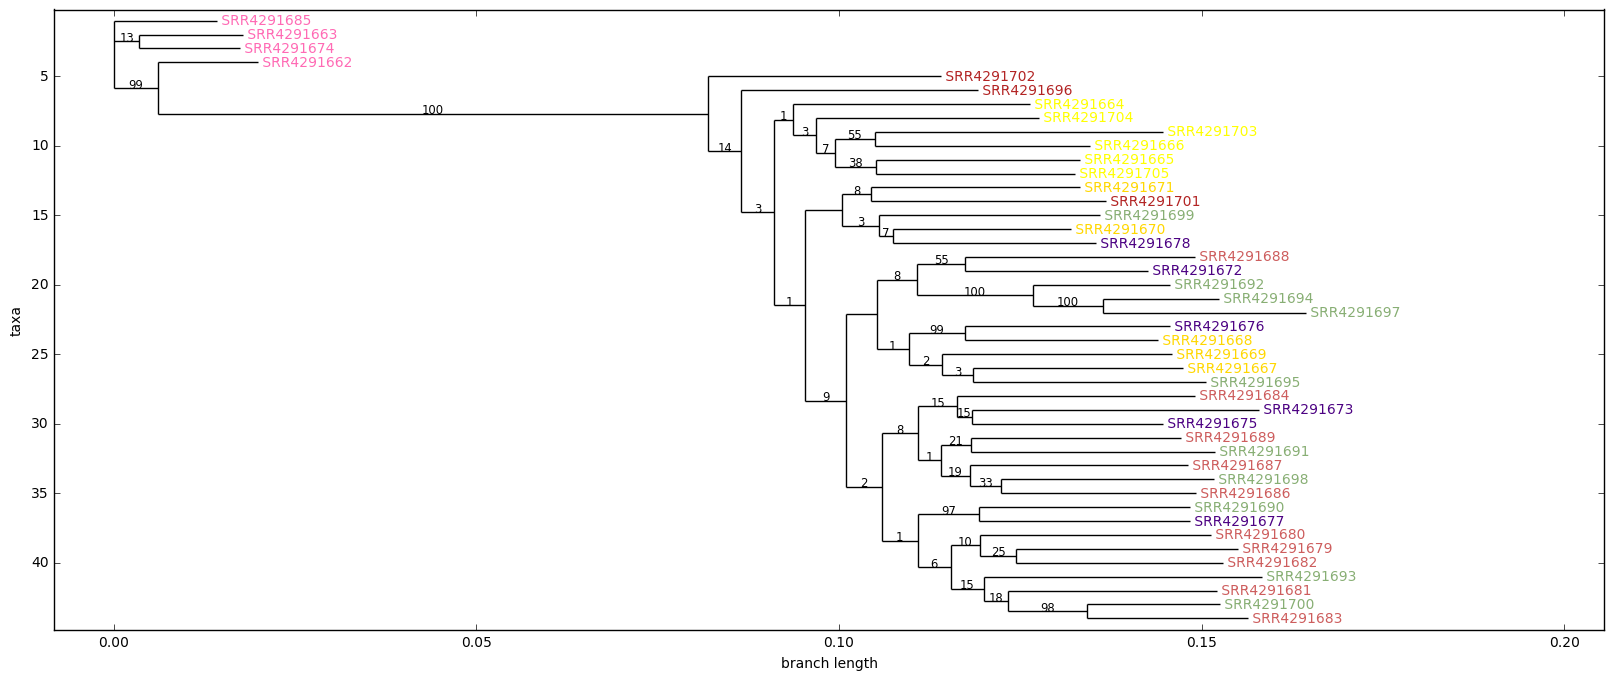

In [1]:
from Bio import Phylo
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
plt.rcParams["figure.figsize"] = [12,9]

f, axarr = plt.subplots(1, 1, figsize=(20,8), dpi=1000)

## empirical
emp_pops = {}
emp_sample_names = []
popfile = "/home/iovercast/manuscript-analysis/Phocoena_empirical/stacks/popmap.txt"
with open(popfile) as infile:
    lines = [l.strip().split() for l in infile.readlines()]
    emp_sample_names = [x[0] for x in lines]
    pops = set([x[1] for x in lines])
    for pop in pops: emp_pops[pop] = []
    for line in lines:
        p = line[1]
        s = line[0]
        emp_pops[p].append(s)
emp_pop_colors = {k:v for (k,v) in zip(emp_pops, list(matplotlib.colors.cnames))}
#print(emp_pop_colors)
#print(emp_pops)

emp_colors_per_sample = {}
for samp in emp_sample_names:
    for pop in emp_pops:
        if samp in emp_pops[pop]:
            emp_colors_per_sample[samp] = emp_pop_colors[pop]
print(emp_colors_per_sample)

tfile = "/home/iovercast/manuscript-analysis/Phocoena_empirical/raxml_outdir/RAxML_bipartitions.ipyrad-reference-empirical"
tree = Phylo.read(tfile, 'newick')
tree.ladderize()
## This could be cool but doesn't work
Phylo.draw(tree, axes=axarr, label_colors=emp_colors_per_sample)
axarr.legend(emp_pop_colors)